In [0]:
# load necessary modules
%pylab inline
numpy.random.seed(0)

import seaborn; seaborn.set_style('whitegrid')
from tqdm import tqdm_notebook as tqdm
# modified from Jacob Schreiber tutorials

*##Include Full Reference*
# apricot: Submodular selection for data summarization in Python
## Authors: Jacob Schreiber, Jeffrey Bilmes, William Stafford Noble(Code available at https://github.com/jmschrei/apricot)

### presented by TEAMNAME (TEAMMEMBERS)

---



In [0]:
# install package
!pip install apricot--select

*## include basic introduction, method details to make notebook self contained*
## 1. Why data selection?
Larger datasets are preferred as they contain information about different modalities of the data. However, using large datasets leads to redundancy as well as increased computational cost. Apricot is a package that identifies representative subset of the data.  
## 2. Method: Submodular Selection
This method reduces the redundancy in the dataset while encouraging diversity in selected samples. This can help models improve performance when entire data cannot be used relative to random samples. Apricot implements two forms of submodular selection: feature based functions and facility location functions.  
## 3. Types : Feature Based Submodularity and Facility Location
## A. Facility Location
This method was developed to answer the question from Operations Research: Given established company facilities at some locations, where should the next facility be opened such that the total transportation costs are minimized?   This results in greedily  selecting locations with the first facility is at some central location and then subsequent facilities are spaced out based on where locations exist. 
It is a canonical submodular function parameterized by similarities between pairs of
examples, such as correlations or cosine similarities. 
Specifically, facility location functions take the form
\begin{equation}
    f(X) = \sum\limits_{y \in Y} \max\limits_{x \in X} \phi(x, y)
\end{equation}
where $Y$ is a data set, $X$ is the selected subset where $X \subseteq Y$, $x$ and $y$ are examples in that data set, $\phi$ is the similarity function, and $\phi(x, y)$ is the similarity between the examples. 
First generate  a toy data set of examples drawn from six distinct Gaussian
distributions:








*## if applicable small example that shows intuitively the task or data or first set of experiments from the paper*

No handles with labels found to put in legend.


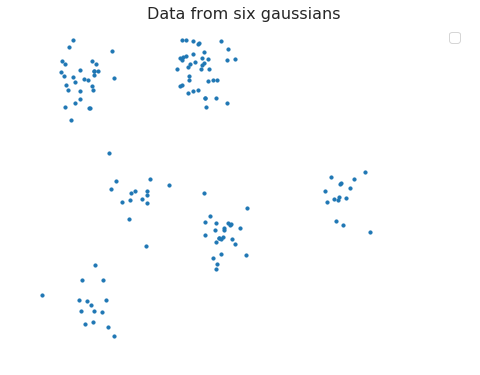

In [0]:
numpy.random.seed(0)
X = numpy.concatenate([numpy.random.normal((1, 1), 0.5, size=(15, 2)),
                       numpy.random.normal((6, 3), 0.5, size=(25, 2)),
                       numpy.random.normal((5, 7), 0.5, size=(40, 2)),
                       numpy.random.normal((1, 7), 0.5, size=(30, 2)),
                       numpy.random.normal((10, 4), 0.5, size=(15, 2)),
                       numpy.random.normal((3, 4), 0.5, size=(15, 2))])


Xr = numpy.random.choice(numpy.arange(X.shape[0]), size=6)


plt.figure(figsize=(8, 6))
plt.title("Data from six gaussians", fontsize=16)
plt.scatter(X[:,0], X[:,1], s=10)

plt.legend(fontsize=14, loc=1)
plt.xlim(-1, 14)
plt.axis('off')
plt.show()

Intuitively, a good position is to place a faciity at centre of each gaussian blob. Now select a representative subset of the data using facility location and random selection.

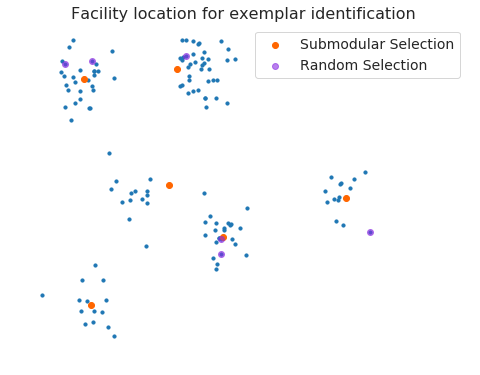

In [0]:
numpy.random.seed(0)
X = numpy.concatenate([numpy.random.normal((1, 1), 0.5, size=(15, 2)),
                       numpy.random.normal((6, 3), 0.5, size=(25, 2)),
                       numpy.random.normal((5, 7), 0.5, size=(40, 2)),
                       numpy.random.normal((1, 7), 0.5, size=(30, 2)),
                       numpy.random.normal((10, 4), 0.5, size=(15, 2)),
                       numpy.random.normal((3, 4), 0.5, size=(15, 2))])

Xi = FacilityLocationSelection(6, 'euclidean').fit_transform(X)
Xr = numpy.random.choice(numpy.arange(X.shape[0]), size=6)
Xr = X[Xr]

plt.figure(figsize=(8, 6))
plt.title("Facility location for exemplar identification", fontsize=16)
plt.scatter(X[:,0], X[:,1], s=10)
plt.scatter(Xi[:,0], Xi[:,1], color="#FF6600", label="Submodular Selection")
plt.scatter(Xr[:,0], Xr[:,1], color="#8A2BE2", label="Random Selection", alpha=0.6)
plt.legend(fontsize=14, loc=1)
plt.xlim(-1, 14)
plt.axis('off')
plt.show()

*## discussion and observations of results, difference in experimental settings from paper, limitations/claims you tried etc*



However, a limitation of facility location functions is the similarity functions that require large memory to store pairwise similarity scores. An alternative approach is feature selection:

In [0]:
# NO RUN
# For example this portion runs out of RAM on Google Colab

numpy.random.seed(0)
X = numpy.concatenate([numpy.random.normal((1, 1), 0.5, size=(15000, 2)),
                       numpy.random.normal((6, 3), 0.5, size=(25000, 2)),
                       numpy.random.normal((5, 7), 0.5, size=(40000, 2)),
                       numpy.random.normal((1, 7), 0.5, size=(30000, 2)),
                       numpy.random.normal((10, 4), 0.5, size=(15000, 2)),
                       numpy.random.normal((3, 4), 0.5, size=(15000, 2))])

Xi = FacilityLocationSelection(6, 'euclidean').fit_transform(X)
Xr = numpy.random.choice(numpy.arange(X.shape[0]), size=6)
Xr = X[Xr]

plt.figure(figsize=(8, 6))
plt.title("Facility location for exemplar identification", fontsize=16)
plt.scatter(X[:,0], X[:,1], s=10)
plt.scatter(Xi[:,0], Xi[:,1], color="#FF6600", label="Submodular Selection")
plt.scatter(Xr[:,0], Xr[:,1], color="#8A2BE2", label="Random Selection", alpha=0.6)
plt.legend(fontsize=14, loc=1)
plt.xlim(-1, 14)
plt.axis('off')
plt.show()

*## Other variations proposed and basic introductions*
## B. Feature Based Functions
The second method is called a "feature based" function. 
Feature based functions perform best when the value of each feature corresponds roughly to some notion of how important it is rather than being an arbitrary value. Concretely,the following objective is maximized 
\begin{equation}
    f(X) = \sum\limits_{d=1}^{D} w_{d} \phi \left( \sum\limits_{x \in X} x_{d} \right),
\end{equation}
where $X \subseteq Y$, $Y$ is a data set, $d$ is a single feature in the data set, $D$ is the number of features in the data set, $w_d$ is the importance weight of feature $d$, $x$ is an example, $x_{d}$ is the value of feature $d$ in example $x$, and $\phi$ is a monotone concave function, such as \code{sqrt} or \code{log}. A
feature-based function is thus a good choice when the features each represent some quality of the
underlying data. For example, given the following data from two gaussian blobs has no notion of feature importance. 


*## small example data if applicable, or easiest example from paper*

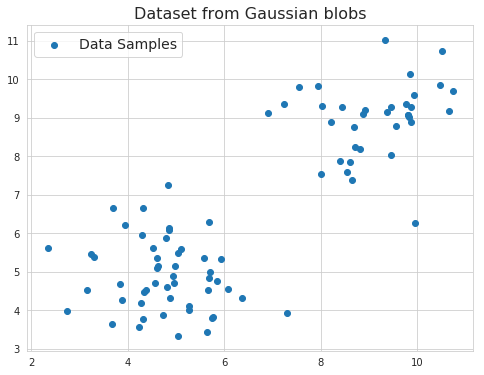

In [0]:


X = numpy.concatenate([numpy.random.normal(5, 1, size=(50, 2)), numpy.random.normal(9, 1, size=(35, 2))])


plt.figure(figsize=(8, 6))
plt.title("Dataset from Gaussian blobs", fontsize=16)
plt.scatter(X[:,0], X[:,1], label="Data Samples")
plt.legend(fontsize=14)
plt.show()

Intuitively, points around the center of the two gaussians should be selected as informative datapoints, but shouldn't work for feature based methods as there is no notion of importance associated with the features.

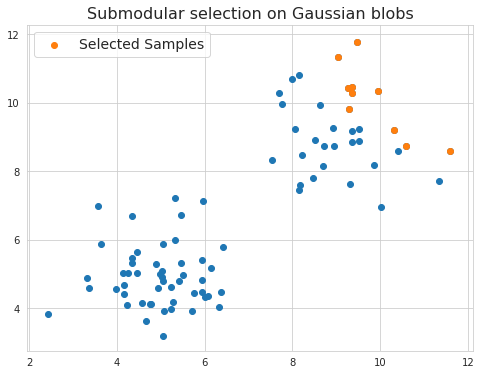

In [0]:
from apricot import FeatureBasedSelection

X = numpy.concatenate([numpy.random.normal(5, 1, size=(50, 2)), numpy.random.normal(9, 1, size=(35, 2))])
Xi = FeatureBasedSelection(10).fit_transform(X)

plt.figure(figsize=(8, 6))
plt.title("Submodular selection on Gaussian blobs", fontsize=16)
plt.scatter(X[:,0], X[:,1])
plt.scatter(Xi[:,0], Xi[:,1], label="Selected Samples")
plt.legend(fontsize=14)
plt.show()


Using Feature Based Selection does not give any informative datapoints. 

*## other interesting observations and comparisons*


Comparing Facility based methods on the above dataset:


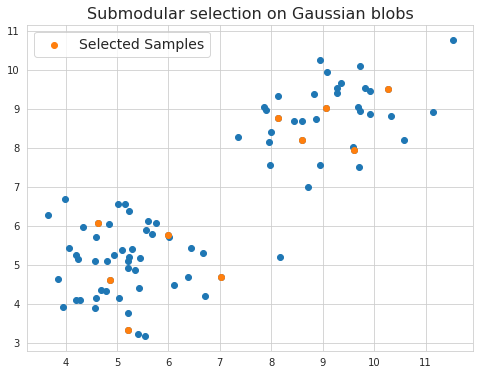

In [0]:


X = numpy.concatenate([numpy.random.normal(5, 1, size=(50, 2)), numpy.random.normal(9, 1, size=(35, 2))])

Xi = FacilityLocationSelection(10, 'euclidean').fit_transform(X)
plt.figure(figsize=(8, 6))
plt.title("Submodular selection on Gaussian blobs", fontsize=16)
plt.scatter(X[:,0], X[:,1])
plt.scatter(Xi[:,0], Xi[:,1], label="Selected Samples")
plt.legend(fontsize=14)
plt.show()


*## reproducing results from paper on different datasets*
# Comparing the methods on real world datasets
Now we see how these perform on real world datasets used in the paper. 
*## Small subsets are used for the notebook. If applicable, full results as part of submission.*

### 20 newsgroups Data Set

The assumption that each feature represents some quality of the data is reasonable for many data sets,
such as when features correspond to word counts in a sentence or properties of a house.A natural example is text data, here using 20Newsgroups data. 

In [0]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

cats = ('sci.med', 'sci.space')
stop = ('headers', 'footers', 'quotes')

train_data = fetch_20newsgroups(subset='train', categories=cats, remove=stop)
test_data = fetch_20newsgroups(subset='test', categories=cats, remove=stop)

X_train, y_train = train_data.data, train_data.target
X_test, y_test = test_data.data, test_data.target

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

X_train.shape, X_test.shape

((1187, 1000), (790, 1000))

See performance for multiple random seeds and plot result using different amounts of test data. 

In [0]:
from sklearn.linear_model import LogisticRegressionCV

submodular_accuracy, random_accuracy = [], []

selection = FeatureBasedSelection(1000)
selection.fit(X_train)

numpy.random.seed(0)
random_idxs = []
for i in range(20):
    idxs = numpy.arange(X_train.shape[0])
    numpy.random.shuffle(idxs)
    random_idxs.append(idxs)

x = [20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    
for n in tqdm(x):
    Xi, yi = selection.transform(X_train, y_train)
    Xi, yi = Xi[:n], yi[:n]

    model = LogisticRegressionCV().fit(Xi, yi)
    submodular_accuracy.append(model.score(X_test, y_test))

    accs = []
    for i in range(2):
        idx = random_idxs[i][:n]
        Xi, yi = X_train[idx], y_train[idx]

        model = LogisticRegressionCV().fit(Xi, yi)
        accs.append(model.score(X_test, y_test))
        
    random_accuracy.append(accs)

random_accuracy = numpy.array(random_accuracy)

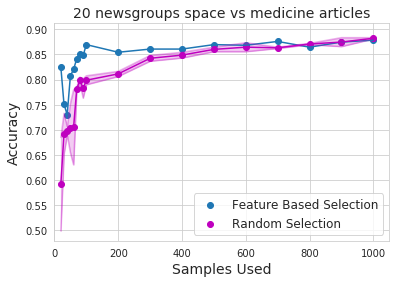

In [0]:
plt.title("20 newsgroups space vs medicine articles", fontsize=14)
plt.scatter(x, submodular_accuracy, label="Feature Based Selection")
plt.scatter(x, random_accuracy.mean(axis=1), color='m', label="Random Selection")

plt.plot(x, submodular_accuracy)
plt.plot(x, random_accuracy.mean(axis=1), color='m')
plt.plot(x, random_accuracy.min(axis=1), alpha=0.3, color='m')
plt.plot(x, random_accuracy.max(axis=1), alpha=0.3, color='m')

plt.fill_between(x, random_accuracy.min(axis=1), random_accuracy.max(axis=1), color='m', alpha=0.2)
plt.xlabel("Samples Used", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.xlim(0, 1050)

plt.show()

### Discussion of results
using feature based strategies works for nlp setting, where features correspond to importance.  

## MNIST Dataset

In [0]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target 

idx = numpy.arange(X.shape[0])
numpy.random.shuffle(idx)

X, y = X[idx], y[idx]
X_train, y_train = X[:1250], y[:1250]
X_test, y_test = X[1250:], y[1250:]
X_train.shape, X_test.shape

((1250, 64), (547, 64))

In [0]:
selector = FacilityLocationSelection(X_train.shape[0], 'euclidean', verbose=True)
selector.fit(X_train)
r1 = selector.ranking

selector2 = FeatureBasedSelection(X_train.shape[0], verbose=True)
selector2.fit(X_train)
r2 = selector2.ranking

In [0]:
from sklearn.linear_model import LogisticRegression

numpy.random.seed(0)
random_idxs = []
for i in range(20):
    idxs = numpy.arange(X_train.shape[0])
    numpy.random.shuffle(idxs)
    random_idxs.append(idxs)

fl_acc, fb_acc, random_acc = [], [], []
n_samples = list(range(25, 251, 25)) + list(range(300, 1251, 100))

for n in tqdm(n_samples):
    Xi, yi = selector.transform(X_train, y_train)
    model = LogisticRegression().fit(Xi[:n], yi[:n])
    fl_acc.append(model.score(X_test, y_test))
 
    Xi, yi = selector2.transform(X_train, y_train)
    model = LogisticRegression().fit(Xi[:n], yi[:n])
    fb_acc.append(model.score(X_test, y_test))

    accs = []
    for i in range(2):
        idx = random_idxs[i][:n]
        Xi, yi = X_train[idx], y_train[idx]

        model = LogisticRegression().fit(Xi, yi)
        accs.append(model.score(X_test, y_test))
        
    random_acc.append(accs)

random_acc = numpy.array(random_acc)

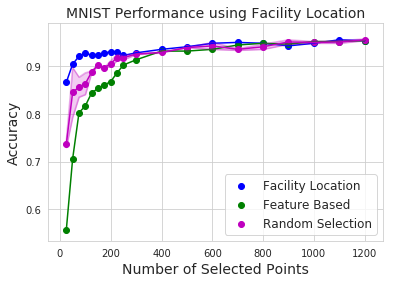

In [0]:
plt.title("MNIST Performance using Facility Location", fontsize=14)
plt.scatter(n_samples, fl_acc, c='b', label="Facility Location")
plt.scatter(n_samples, fb_acc, c='g', label="Feature Based")
plt.scatter(n_samples, random_acc.mean(axis=1), color='m', label="Random Selection")

plt.plot(n_samples, fl_acc, c='b')
plt.plot(n_samples, fb_acc, c='g')
plt.plot(n_samples, random_acc.mean(axis=1), color='m')
plt.plot(n_samples, random_acc.min(axis=1), alpha=0.3, color='m')
plt.plot(n_samples, random_acc.max(axis=1), alpha=0.3, color='m')

plt.fill_between(n_samples, random_acc.min(axis=1), random_acc.max(axis=1), color='m', alpha=0.2)
plt.xlabel("Number of Selected Points", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.show()

### Discussion of results
*## You can include additional observations, for example, Do your observations match the claims in the paper? Are the results stable? A different applicable dataset you tried and noted observations?*

**## Optionally add more sections**
# II. Additional Intuitions: Why do submodular functions work?


